In [10]:
# Set seed for reproducibility
SEED = 42

# Import necessary libraries
import os

# Set environment variables before importing modules
os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['MPLCONFIGDIR'] = os.getcwd() + '/configs/'

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

# Import necessary modules
import logging
import random
import numpy as np

# Set seeds for random number generators in NumPy and Python
np.random.seed(SEED)
random.seed(SEED)

# Import PyTorch
import torch
torch.manual_seed(SEED)
from torch import nn
from torchsummary import summary
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import TensorDataset, DataLoader
logs_dir = "tensorboard"

%load_ext tensorboard


if torch.cuda.is_available():
    device = torch.device("cuda")
    torch.cuda.manual_seed_all(SEED)
    torch.backends.cudnn.benchmark = True
else:
    device = torch.device("cpu")

print(f"PyTorch version: {torch.__version__}")
print(f"Device: {device}")

# Import other libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Configure plot display settings
sns.set(font_scale=1.4)
sns.set_style('white')
plt.rc('font', size=14)
%matplotlib inline



The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
PyTorch version: 2.9.0+cpu
Device: cpu


In [11]:
df_train_merged = pd.read_csv("pirate_pain_train.csv")
df_train_merged.head()

,sample_index,time,pain_survey_1,pain_survey_2,pain_survey_3,pain_survey_4,n_legs,n_hands,n_eyes,joint_00,joint_01,joint_02,joint_03,joint_04,joint_05,joint_06,joint_07,joint_08,joint_09,joint_10,joint_11,joint_12,joint_13,joint_14,joint_15,joint_16,joint_17,joint_18,joint_19,joint_20,joint_21,joint_22,joint_23,joint_24,joint_25,joint_26,joint_27,joint_28,joint_29,joint_30
0,0,0,2,0,2,1,two,two,two,1.094705,0.985281,1.018302,1.010385,0.971717,1.022263,0.901755,0.999659,0.712989,1.050142,0.529555,0.447370,1.091046,0.000000,3.053976e-07,0.000005,0.000004,0.000000,0.000017,0.000012,6.140248e-07,3.499558e-06,1.945042e-06,0.000004,1.153299e-05,0.000004,0.017592,0.013508,0.026798,0.027815,0.5
1,0,1,2,2,2,2,two,two,two,1.135183,1.021175,0.994343,1.052364,0.999944,1.012395,0.923341,1.035850,0.722685,1.060313,0.446810,0.414432,1.045862,0.000012,4.806347e-06,0.000000,0.000004,0.000009,0.000000,0.000010,1.931978e-06,3.976952e-07,6.765107e-07,0.000006,4.643774e-08,0.000000,0.013352,0.000000,0.013377,0.013716,0.5
2,0,2,2,0,2,2,two,two,two,1.080745,0.962842,1.009588,0.977169,0.984740,1.019930,0.976567,1.072751,0.668043,1.011410,0.432499,0.431535,1.088221,0.000000,3.125993e-07,0.000000,0.000001,0.000000,0.000010,0.000002,5.730838e-07,1.533820e-07,1.698525e-07,0.000001,2.424536e-06,0.000003,0.016225,0.008110,0.024097,0.023105,0.5
3,0,3,2,2,2,2,two,two,two,0.938017,1.081592,0.998021,0.987283,0.924161,1.002642,0.830982,1.080755,0.702085,1.047223,0.478806,0.420665,1.096832,0.000000,3.161889e-07,0.000000,0.000003,0.000035,0.000000,0.000007,3.677486e-05,1.006865e-05,5.511079e-07,0.000002,5.432416e-08,0.000000,0.011832,0.007450,0.028613,0.024648,0.5
4,0,4,2,2,2,2,two,two,two,1.090185,1.032145,1.008710,0.963658,1.016291,1.031301,0.956008,0.988023,0.712197,1.044731,0.452906,0.476537,1.103968,0.000000,3.611245e-07,0.000002,0.000001,0.000000,0.000030,0.000002,2.037939e-05,4.437266e-06,1.735459e-07,0.000002,5.825366e-08,0.000007,0.005360,0.002532,0.033026,0.025328,0.5


In [12]:
df_test = pd.read_csv("pirate_pain_test.csv")
df_test.head()

,sample_index,time,pain_survey_1,pain_survey_2,pain_survey_3,pain_survey_4,n_legs,n_hands,n_eyes,joint_00,joint_01,joint_02,joint_03,joint_04,joint_05,joint_06,joint_07,joint_08,joint_09,joint_10,joint_11,joint_12,joint_13,joint_14,joint_15,joint_16,joint_17,joint_18,joint_19,joint_20,joint_21,joint_22,joint_23,joint_24,joint_25,joint_26,joint_27,joint_28,joint_29,joint_30
0,0,0,2,2,2,2,two,two,two,0.842535,0.845934,0.573001,0.395143,0.302871,0.157435,0.977430,0.950154,1.057105,1.061014,0.327447,0.253370,1.177406,0.000013,0.000012,0.000010,0.000009,0.000078,0.000029,0.000019,0.000031,0.000003,0.000004,0.000003,0.000003,0.000068,0.019372,0.066324,0.022228,0.013576,0.5
1,0,1,2,2,2,2,two,two,two,0.898836,0.814810,0.629339,0.469420,0.247027,0.144169,1.005981,0.993922,1.105165,1.015887,0.331900,0.294067,0.985953,0.000017,0.000009,0.000010,0.000009,0.000035,0.000034,0.000019,0.000031,0.000003,0.000004,0.000004,0.000003,0.000029,0.069747,0.080417,0.023650,0.038793,0.5
2,0,2,2,2,2,2,two,two,two,0.957765,0.890690,0.608661,0.444819,0.295657,0.113608,0.989857,0.982370,1.142910,1.032120,0.384204,0.272972,1.059171,0.000009,0.000013,0.000010,0.000014,0.000035,0.000027,0.000025,0.000048,0.000006,0.000004,0.000009,0.000004,0.000008,0.054968,0.058811,0.027023,0.054202,0.5
3,0,3,1,2,2,2,two,two,two,0.832596,0.751427,0.605583,0.504279,0.236913,0.145222,1.001372,0.944723,1.057460,1.013968,0.381349,0.283902,1.132100,0.000012,0.000010,0.000013,0.000009,0.000035,0.000047,0.000018,0.000031,0.000005,0.000004,0.000003,0.000004,0.000015,0.048695,0.047128,0.016151,0.024983,0.5
4,0,4,2,2,2,0,two,two,two,0.805971,0.810004,0.565170,0.514796,0.269761,0.069992,1.023796,0.948609,1.008785,0.974159,0.380332,0.311384,0.980731,0.000009,0.000008,0.000010,0.000009,0.000035,0.000027,0.000018,0.000045,0.000006,0.000004,0.000003,0.000003,0.000008,0.019762,0.031116,0.015618,0.017931,0.5


In [13]:
df_train_labels = pd.read_csv("pirate_pain_train_labels.csv")
df_train_labels.head()

,sample_index,label
0,0,no_pain
1,1,no_pain
2,2,low_pain
3,3,no_pain
4,4,no_pain


## Analisi Statistica Dettagliata delle Colonne 'joint_xx'

Per iniziare l'analisi, esamineremo le statistiche descrittive delle colonne `joint_xx` sia nel dataset di training (`df_train_merged`) che in quello di test (`df_test`). Questo ci darà una prima idea della distribuzione, della media, della deviazione standard, dei valori minimi e massimi di ciascuna feature, e ci permetterà di individuare eventuali differenze superficiali tra i due set di dati.

In [14]:
# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Define joint_columns and target_label_column
joint_columns = [f'joint_{i:02d}' for i in range(31)]
target_label_column = 'label'

In [15]:
print("### Statistiche Descrittive per le colonne 'joint_xx' nel dataset di Training (df_train_merged):")
display(df_train_merged[joint_columns].describe())

### Statistiche Descrittive per le colonne 'joint_xx' nel dataset di Training (df_train_merged):


,joint_00,joint_01,joint_02,joint_03,joint_04,joint_05,joint_06,joint_07,joint_08,joint_09,joint_10,joint_11,joint_12,joint_13,joint_14,joint_15,joint_16,joint_17,joint_18,joint_19,joint_20,joint_21,joint_22,joint_23,joint_24,joint_25,joint_26,joint_27,joint_28,joint_29,joint_30
count,105760.000000,105760.000000,105760.000000,105760.000000,105760.000000,105760.000000,105760.000000,105760.000000,105760.000000,105760.000000,105760.000000,105760.000000,105760.000000,105760.000000,1.057600e+05,1.057600e+05,1.057600e+05,105760.000000,105760.000000,105760.000000,105760.000000,1.057600e+05,1.057600e+05,1.057600e+05,1.057600e+05,1.057600e+05,105760.000000,105760.000000,105760.000000,105760.000000,105760.0
mean,0.943095,0.916955,0.779296,0.767921,0.709186,0.711306,0.875185,0.837427,0.849700,0.909554,0.694840,0.691105,1.047287,0.000092,8.068677e-05,1.038032e-04,1.085133e-04,0.000351,0.000293,0.000191,0.000319,3.972126e-05,4.176794e-05,3.561780e-05,3.138109e-05,1.024604e-04,0.041905,0.058244,0.049886,0.062273,0.5
std,0.202051,0.197608,0.295605,0.300787,0.418058,0.411783,0.240900,0.237904,0.180489,0.180320,0.257572,0.262645,0.110834,0.001202,1.481660e-03,1.287669e-03,1.628836e-03,0.004383,0.004987,0.003892,0.006461,4.974496e-03,5.472244e-03,1.235450e-03,4.062914e-04,3.206128e-03,0.060293,0.079819,0.060773,0.072597,0.0
min,0.000000,0.000000,0.001015,0.005403,0.000000,0.000000,0.000000,0.000000,0.122095,0.004671,0.107917,0.072233,0.107136,0.000000,2.763050e-07,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.510494e-07,0.000000e+00,1.063144e-08,0.000000e+00,0.000203,0.000000,0.000000,0.000000,0.5
25%,0.828277,0.811445,0.568850,0.520020,0.184585,0.210551,0.839166,0.781375,0.717725,0.825898,0.469688,0.460407,0.983152,0.000000,6.538634e-07,0.000000e+00,5.348361e-07,0.000000,0.000000,0.000002,0.000000,6.545878e-08,3.321650e-07,3.275038e-07,2.841805e-07,7.161332e-07,0.009885,0.012652,0.016290,0.019638,0.5
50%,1.005126,0.979468,0.909549,0.914834,0.930007,0.950628,0.937363,0.904914,0.831221,0.940954,0.690806,0.705150,1.057917,0.000001,2.165072e-06,7.069540e-07,1.825457e-06,0.000002,0.000001,0.000004,0.000004,8.302747e-07,1.095971e-06,1.024209e-06,8.746147e-07,3.126723e-06,0.021898,0.031739,0.031843,0.039041,0.5
75%,1.081039,1.056611,0.995187,0.994324,1.036497,1.032400,1.013150,0.984410,0.991104,1.030941,0.866482,0.851772,1.124471,0.000006,6.396479e-06,5.481908e-06,6.550744e-06,0.000019,0.000015,0.000014,0.000019,2.800090e-06,3.079465e-06,3.021830e-06,2.507548e-06,9.946107e-06,0.048579,0.071051,0.058741,0.079518,0.5
max,1.407968,1.334613,1.306046,1.254729,1.359204,1.387731,1.410532,1.361969,1.357288,1.388105,1.631494,1.464157,1.396754,0.073852,2.642323e-01,1.003470e-01,1.888070e-01,0.420947,0.728382,0.616061,1.096014,1.442198e+00,1.305001e+00,2.742411e-01,3.643074e-02,9.473540e-01,1.223617,1.187419,1.412037,1.370765,0.5


### Interpretazione delle Statistiche Descrittive (Training)

Dal dataset di training, possiamo osservare quanto segue:

*   **Variazione nelle Medie**: Le medie delle colonne `joint_xx` variano considerevolmente. Ad esempio, `joint_00` ha una media di circa 0.94, mentre `joint_20` e `joint_21` hanno medie molto più basse, vicine allo zero.
*   **Range di Valori**: Alcune colonne come `joint_00` e `joint_01` hanno un range di valori più ampio (min e max), mentre altre come `joint_30` mostrano un valore costante di 0.5 per tutti i campioni, suggerendo che potrebbe essere una feature statica o un indicatore.
*   **Deviazione Standard**: La deviazione standard indica la dispersione dei dati. Colonne come `joint_04` e `joint_05` hanno deviazioni standard relativamente alte, suggerendo una maggiore variabilità nei loro valori rispetto ad altre.
*   **Valori Anomali/Outlier**: I valori minimi e massimi possono dare un'indicazione della presenza di outlier. Alcune colonne presentano valori massimi significativamente più alti rispetto al 75° percentile, il che potrebbe indicare la presenza di valori estremi.

In [16]:
print("\n### Statistiche Descrittive per le colonne 'joint_xx' nel dataset di Test (df_test):")
display(df_test[joint_columns].describe())


### Statistiche Descrittive per le colonne 'joint_xx' nel dataset di Test (df_test):


,joint_00,joint_01,joint_02,joint_03,joint_04,joint_05,joint_06,joint_07,joint_08,joint_09,joint_10,joint_11,joint_12,joint_13,joint_14,joint_15,joint_16,joint_17,joint_18,joint_19,joint_20,joint_21,joint_22,joint_23,joint_24,joint_25,joint_26,joint_27,joint_28,joint_29,joint_30
count,211840.000000,211840.000000,211840.000000,211840.000000,211840.000000,211840.000000,211840.000000,211840.000000,211840.000000,211840.000000,211840.000000,211840.000000,211840.000000,211840.000000,211840.000000,211840.000000,211840.000000,211840.000000,211840.000000,211840.000000,211840.000000,211840.000000,211840.000000,2.118400e+05,2.118400e+05,211840.000000,211840.000000,211840.000000,211840.000000,211840.000000,211840.0
mean,0.984106,1.002312,0.833719,0.839993,0.727537,0.770178,0.890958,0.888862,0.904452,0.939252,0.751285,0.724266,1.120347,0.000099,0.000089,0.000132,0.000115,0.000370,0.000300,0.000269,0.000374,0.000032,0.000024,4.138805e-05,3.408469e-05,0.000107,0.040524,0.060134,0.052490,0.061218,0.5
std,0.204744,0.191175,0.298458,0.298573,0.416147,0.402997,0.234902,0.235090,0.190413,0.179579,0.249957,0.246918,0.117641,0.001260,0.001120,0.001826,0.001781,0.005643,0.005504,0.007644,0.007861,0.001464,0.000413,5.570593e-04,6.285418e-04,0.001203,0.057234,0.078081,0.058698,0.066651,0.0
min,0.000000,0.036813,0.014754,0.047624,0.000000,0.001314,0.000000,0.000000,0.032917,0.000000,0.195656,0.039110,0.232681,0.000000,0.000004,0.000004,0.000000,0.000000,0.000000,0.000000,0.000009,0.000002,0.000001,0.000000e+00,0.000000e+00,0.000000,0.000000,0.004475,0.004083,0.000000,0.5
25%,0.867980,0.897176,0.625202,0.604872,0.223317,0.292825,0.839565,0.826372,0.775048,0.852894,0.526283,0.505454,1.058541,0.000006,0.000007,0.000009,0.000000,0.000007,0.000000,0.000005,0.000026,0.000003,0.000003,4.412668e-07,2.325231e-07,0.000000,0.010886,0.017376,0.020317,0.021007,0.5
50%,1.040931,1.063110,0.969119,0.979624,0.943414,0.996528,0.947562,0.957547,0.898545,0.965782,0.742582,0.742252,1.133275,0.000009,0.000009,0.000010,0.000006,0.000027,0.000016,0.000015,0.000032,0.000004,0.000004,2.527479e-06,2.060598e-06,0.000006,0.022146,0.033317,0.035334,0.038696,0.5
75%,1.128461,1.139088,1.052242,1.060542,1.055148,1.082449,1.031237,1.038240,1.050741,1.057830,0.935716,0.891458,1.199683,0.000013,0.000013,0.000015,0.000010,0.000041,0.000030,0.000024,0.000046,0.000006,0.000006,4.590578e-06,3.708785e-06,0.000014,0.046722,0.069825,0.061336,0.077690,0.5
max,1.500341,1.499030,1.346970,1.333893,1.420582,1.420990,1.447161,1.452162,1.421023,1.429407,1.512570,1.500996,1.500257,0.170132,0.125523,0.314769,0.332521,0.527590,1.510331,1.553126,1.437842,0.389906,0.062781,6.476609e-02,1.249919e-01,0.167318,1.299322,1.375895,1.412636,1.333794,0.5


### Confronto delle Statistiche Descrittive (Training vs. Test)

Confrontando i set di training e test, notiamo alcune differenze:

*   **Medie diverse**: Le medie di molte colonne `joint_xx` sono leggermente diverse tra i due set. Ad esempio, `joint_00` ha una media di ~0.94 nel training e ~0.98 nel test. Queste differenze, anche se piccole, potrebbero indicare una leggera variazione nella distribuzione dei dati.
*   **Deviazioni standard simili ma non identiche**: Le deviazioni standard tendono ad essere simili, ma ci sono variazioni che potrebbero influenzare il comportamento dei modelli.
*   **Range di valori**: I valori minimi e massimi sono generalmente comparabili, ma ci sono casi in cui il range è leggermente diverso, il che potrebbe essere dovuto alla varianza dei campioni.
*   **`joint_30`**: La colonna `joint_30` è costante a 0.5 in entrambi i set di dati, confermando la sua natura statica. Potrebbe non essere utile per la predizione ma è importante notarne la presenza.

Queste osservazioni preliminari suggeriscono che, sebbene i dataset siano simili, potrebbero esserci differenze nelle distribuzioni che meritano un'analisi più approfondita con test di ipotesi.

## Confronto delle Distribuzioni Train vs. Test (Visuale)

Per avere una comprensione visiva più chiara delle differenze tra le distribuzioni delle colonne `joint_xx` nei set di training e test, utilizzeremo i grafici di densità. Per evitare di generare troppi grafici (31 colonne), ci concentreremo su un sottoinsieme selezionato di colonne (`joint_00`, `joint_10`, `joint_20`) che rappresentano diverse fasce di correlazione o comportamento. Questi grafici ci aiuteranno a identificare se le forme, le posizioni e le dispersioni delle distribuzioni differiscono.

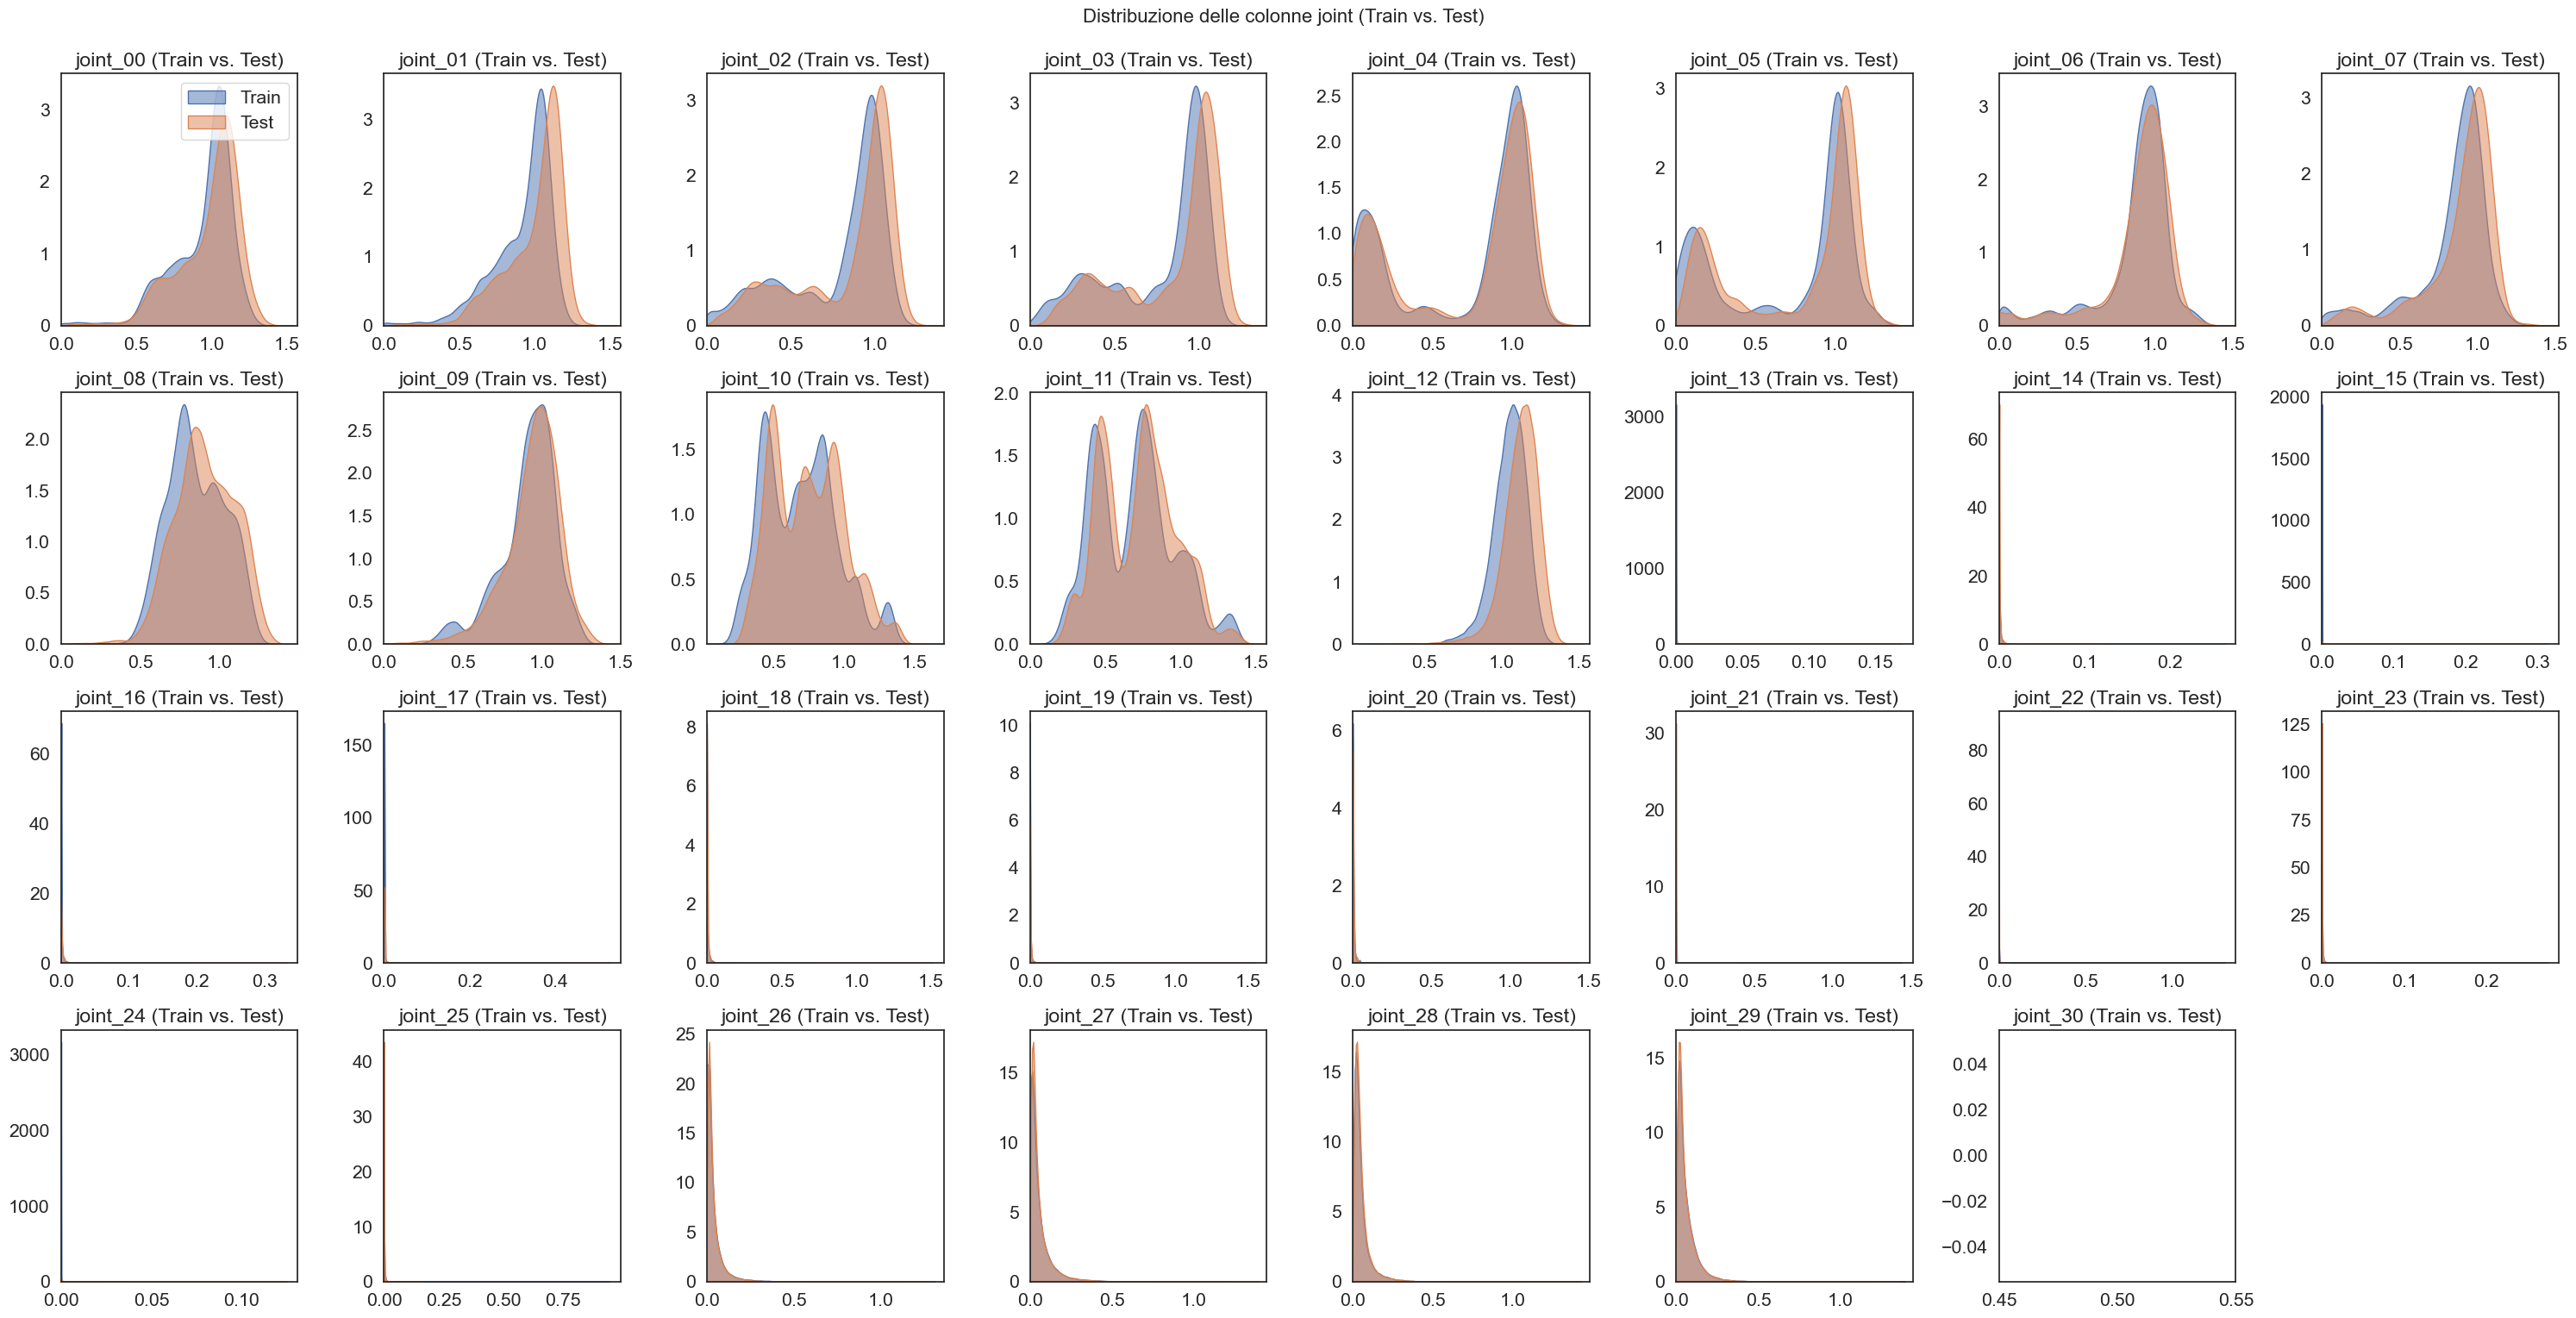

In [17]:
fig, axes = plt.subplots(4, 8, figsize=(30, 15))
axes = axes.flatten()

for i, col in enumerate(joint_columns):
    if i < len(axes):
        sns.kdeplot(df_train_merged[col], label='Train', fill=True, alpha=0.5, ax=axes[i])
        sns.kdeplot(df_test[col], label='Test', fill=True, alpha=0.5, ax=axes[i])
        axes[i].set_title(f'{col} (Train vs. Test)')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        if i == 0:
            axes[i].legend(loc='upper right') # Add legend only once
        else:
            # Hide legend from other plots to avoid clutter
            if axes[i].get_legend() is not None:
                axes[i].get_legend().remove()

        # Set x-axis limits for columns
        # Combine train and test data for better statistics
        combined_data = pd.concat([df_train_merged[col], df_test[col]])
        
        min_data_val_col = combined_data.min()
        max_data_val_col = combined_data.max()
        
        # Use percentiles to determine a more robust range
        p1 = combined_data.quantile(0.01)
        p99 = combined_data.quantile(0.99)

        # Handle cases where min and max are exactly the same (constant column)
        if min_data_val_col == max_data_val_col:
            if min_data_val_col == 0:
                dynamic_buffer = 1e-7 # Absolute tiny buffer for zero
            else:
                dynamic_buffer = abs(min_data_val_col) * 0.1 # 10% of the value itself
                if dynamic_buffer == 0: dynamic_buffer = 1e-7 # Fallback if e.g., min_data_val_col is 1e-20
            axes[i].set_xlim(min_data_val_col - dynamic_buffer, min_data_val_col + dynamic_buffer)
        else:
            range_magnitude = max_data_val_col - min_data_val_col
            percentile_range = p99 - p1
            
            # For very small values (like joint_13+), use percentile-based range
            if max_data_val_col < 1e-5 or range_magnitude < 1e-6:
                # Use percentiles to avoid extreme outliers affecting the scale
                if percentile_range > 0:
                    dynamic_buffer = percentile_range * 0.15
                else:
                    # Fallback to order of magnitude approach
                    if abs(max_data_val_col) < 1e-7:
                        dynamic_buffer = 1e-8
                    else:
                        order_of_magnitude = 10**np.floor(np.log10(abs(max_data_val_col) + 1e-10))
                        dynamic_buffer = order_of_magnitude * 0.2
                
                # Use percentile-based limits for better readability
                lower_limit = max(p1 - dynamic_buffer, min_data_val_col)
                upper_limit = min(p99 + dynamic_buffer, max_data_val_col)
            else:
                # For normal-range values, use the original approach
                dynamic_buffer = range_magnitude * 0.05
                lower_limit = min_data_val_col - dynamic_buffer
                upper_limit = max_data_val_col + dynamic_buffer
            
            # Ensure a minimum absolute buffer if calculated buffer is too small
            if (upper_limit - lower_limit) < 1e-9:
                center = (upper_limit + lower_limit) / 2
                lower_limit = center - 5e-10
                upper_limit = center + 5e-10

            # Ensure the lower bound does not go negative if all data is non-negative
            if min_data_val_col >= 0 and lower_limit < 0:
                lower_limit = 0

            axes[i].set_xlim(lower_limit, upper_limit)

# Hide any unused subplots
for j in range(len(joint_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Distribuzione delle colonne joint (Train vs. Test)', y=1.02, fontsize=16)
# plt.savefig('distribuzione_joint_train_vs_test.png') # Aggiunto per salvare l'immagine
plt.show()
